<a href="https://colab.research.google.com/github/conichito/F3104/blob/main/Tarea%203/tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos librerias
import numpy as np
import matplotlib.pyplot as plt

#P1

In [ ]:
N=3
A = np.empty((N,N))
L = np.empty((N,N))
x = np.empty(N)
y = np.empty(N)
A = np.array([[0., 3., 2.],
              [5., 0., 1.],
              [1., 1., 0.]])
b = np.array([20.,27.,6.])

print('A=')
for row in A:         # print A
    for item in row:
        print('%.2f      ' % item, end="")
    print()

print('b=')
for item in b:         # print b
    print('%.2f      ' % item, end="")
print()

A=
0.00      3.00      2.00      
5.00      0.00      1.00      
1.00      1.00      0.00      
b=
20.00      27.00      6.00      


In [ ]:
# Definimos P inicialmente como matriz I
P = np.eye(N)

for j in range(N):    # j es el indice de la columna
    for i in range(1,j+1):
        A[i,j] -= np.dot(A[i,:i],A[:i,j])
    pivot = A[j,j]
    for i in range(j+1,N):
        A[i,j] -= np.dot(A[i,:j],A[:j,j])
    pivot_fila = np.argmax(np.abs(A[j:, j])) + j
    if pivot_fila != j:
        A[[j, pivot_fila], :] = A[[pivot_fila, j], :]
        P[[j, pivot_fila], :] = P[[pivot_fila, j], :] #Registramos los pivoteos dentro de la matriz P
    for i in range(j+1,N):
        A[i,j] = A[i,j]/A[j,j]
print('A_fin=')
for row in A:         # imprimimos el A final
    for item in row:
        print('%.2f      ' % item, end="")
    print()

print('P=')
for row in P:         # imprimimos el P final
    for item in row:
        print('%.2f      ' % item, end="")
    print()

A_fin=
5.00      0.00      1.00      
0.00      3.00      2.00      
0.20      0.33      -0.87      
P=
0.00      1.00      0.00      
1.00      0.00      0.00      
0.00      0.00      1.00      


In [ ]:
# Here we separate L and U
for i in range(N):
    for j in range(N):
        if i == j:
            L[i,j] = 1
        else:
            if i > j:
                L[i,j] = A[i,j]
                A[i,j] = 0
            else:
                L[i,j] = 0
print('L=')
for row in L:         # a little print function
    for item in row:
        print('%.2f      ' % item, end="")
    print()
print('U=')
for row in A:         # a little print function
    for item in row:
        print('%.2f      ' % item, end="")
    print()

L=
1.00      0.00      0.00      
0.00      1.00      0.00      
0.20      0.33      1.00      
U=
5.00      0.00      1.00      
0.00      3.00      2.00      
0.00      0.00      -0.87      


In [ ]:
# Definimos b_prime como P*b
b_prime = np.dot(P, b)
print('b_prime=', b_prime)

b_prime= [27. 20.  6.]


In [ ]:
for i in range(N):
    y[i] = b_prime[i] - np.dot(L[i,:i],y[:i])
print('y=',y)

y= [27.         20.         -6.06666667]


In [ ]:
for i in range(N-1, -1, -1):
    x[i] = (y[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
print('x=',x)

x= [4. 2. 7.]


In [ ]:
# Calcularmos el determinante de la matriz A

det_P = -1 # Por enunciado
det_L = 1 # L tiene valores 1 en su diagonal
det_U = 1 # Definimos como 1 por mientras antes de ciclo for

for i in range(N):
  det_U *= A[i,i] # Multiplicamos diagonal

print('Determinante de P =', det_P)
print('Determinante de L =', det_L)
print('Determinante de U =', det_U)
print('Determinante de A =', (det_L*det_U)/det_P)

Determinante de P = -1
Determinante de L = 1
Determinante de U = -13.0
Determinante de A = 13.0


#P2

In [ ]:
# Definimos P(x)
def P(x):
  return (x**7
        - 3*x**6
        - 8*x**5
        + 20*x**4
        + 15*x**3
        - 13*x**2
        + 24*x - 30)

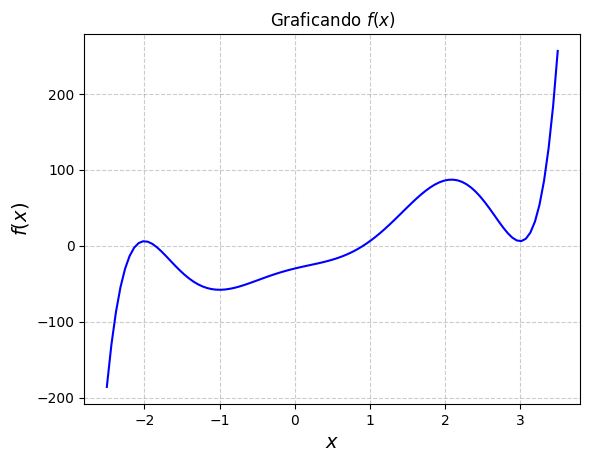

In [ ]:
# Graficamos P(x)
a, b, N = -2.5, 3.5, 100
x = np.linspace(a, b, N)
y = P(x)

plt.plot(x, y, color='blue')
plt.title('Graficando $f(x)$')
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$f(x)$", fontsize=14)
plt.grid(True, ls = '--', c = 'k', alpha = 0.2)

plt.show()

In [ ]:
# Se define una función para mostrar información sobre las raices encontradas
def root_interval(l1, l2, L, function):
    var = (l2 - l1) / L
    delta = 1e-5
    max_iter = int(np.log2(var/delta)) + 1

    for j in range(L):
        x1, x2 = l1 + j * var, l1 + (j + 1) * var
        x0 = 0.5*(x1 + x2)
        if P(x1) * P(x2) < 0:
            root, dist, count = function(x1, x2, delta, max_iter)
            print(f'Root: {root}')
            f_root = P(root)
            print(f'f(root): {f_root}')
            print('---')

    data = [dist, count, root, f_root]
    return data

In [ ]:
# Método Newton-Raphson
def dP(x):
    return (7*x**6
        - 6*3*x**5
        - 5*8*x**4
       + 4*20*x**3
       + 3*15*x**2
       - 2*13*x
       + 24)

def find_root_nr(x1,x2, delta, max_iter):
    f1 = P(x1)
    count = 0
    while np.abs(x2 - x1) > delta and count < max_iter:
        x3 = x1 - f1 / df(x1)
        f3 = P(x3)
        x2, f2 = x1, f1
        x1, f1 = x3, f3
        count += 1

    dist = x2 - x1
    print(f'Distancia entre bordes: {dist}')
    print(f'Numero de iteraciones: {count}')
    return 0.5 * (x1 + x2), dist, count

# Llamamos a las raices
nr = root_interval(a, b, N, find_root_nr)

Distancia entre bordes: -6.966450971646054e-09
Numero de iteraciones: 4
Root: -2.1159014079761063
f(root): -3.916656012847852e-07
---
Distancia entre bordes: 1.2901130386211435e-08
Numero de iteraciones: 4
Root: -1.8587305525317739
f(root): -4.861702791458811e-07
---
Distancia entre bordes: 3.819898023338375e-06
Numero de iteraciones: 3
Root: 0.911358750174958
f(root): 0.00012097026925061982
---


In [ ]:
# Método de la secante

def find_root(x1,x2, delta, max_iter):
#    f1, f2 = f(x1), f(x2)
    f1 = P(x1)
    f2 = P(x2)
    count = 0
    while np.abs(x2 - x1) > delta and count < max_iter:
        x3 = x1 - f1 * (x2 - x1) / (f2-f1)
        f3 = P(x3)
        x1, f1 = x2, f2
        x2, f2 = x3, f3
        count += 1

    dist = x2 - x1
    print(f'Distancia entre bordes: {dist}')
    print(f'Numero de iteraciones: {count}')
    return 0.5 * (x1 + x2), dist, count

# Llamamos a las raices
nr = root_interval(a, b, N, find_root)

Distancia entre bordes: -1.8355257491720067e-07
Numero de iteraciones: 5
Root: -2.11590131274646
f(root): 1.0316272373245283e-05
---
Distancia entre bordes: -3.5085910488064087e-07
Numero de iteraciones: 4
Root: -1.8587303836148057
f(root): -1.3217215865779508e-05
---
Distancia entre bordes: 2.384544254385723e-06
Numero de iteraciones: 3
Root: 0.9113556486043957
f(root): -7.547227733795125e-05
---


In [ ]:
# Método de encajonamiento

def find_root_en(x1, x2, delta, max_iter):
    f1, f2 = P(x1), P(x2)
#    for _ in range(max_iter):
    count = 0
    while np.abs(x2 - x1) > delta and count < max_iter:
        x3 = 0.5 * (x1 + x2)
        f3 = P(x3)
        if f1 * f3 > 0:
            x1, f1 = x3, f3
        else:
            x2, f2 = x3, f3
        count += 1
        dist = x2 - x1
    print(f'Distancia entre bordes: {dist}')
    print(f'Numero de iteraciones: {count}')
    return 0.5 * (x1 + x2), dist, count


# Llamamos a las raices
nr = root_interval(a, b, N, find_root_en)

Distancia entre bordes: 7.324218750159872e-06
Numero de iteraciones: 13
Root: -2.1158996582031255
f(root): 0.00019635687134922364
---
Distancia entre bordes: 7.324218750159872e-06
Numero de iteraciones: 13
Root: -1.8587316894531252
f(root): 8.52018142580846e-05
---
Distancia entre bordes: 7.3242187499378275e-06
Numero de iteraciones: 13
Root: 0.9113537597656248
f(root): -0.00019510420250412608
---


In [ ]:
# Método de posición falsa
def find_root_pf(x1, x2, delta, ma_iter):
    f1, f2 = P(x1), P(x2)
    count = 0
    while np.abs(x2 - x1) > delta and count < max_iter:
        x3 = x1 - f1 * (x2 - x1) / (f2-f1)
        f3 = P(x3)
        if f1 * f3 > 0:
            x1, f1 = x3, f3
        else:
            x2, f2 = x3, f3
        count += 1
        dist = x2 - x1
    print(f'Distancia entre bordes: {dist}')
    print(f'Numero de iteraciones: {count}')
    return 0.5 * (x1 + x2), dist, count

# Llamamos a las raices
nr = root_interval(a, b, N, find_root_pf)

Distancia entre bordes: 0.024098595507155984
Numero de iteraciones: 13
Root: -2.127950702246422
f(root): -1.4441420080161507
---
Distancia entre bordes: 2.220446049250313e-16
Numero de iteraciones: 12
Root: -1.858730558982339
f(root): 1.4210854715202004e-14
---
Distancia entre bordes: 4.6629367034256575e-15
Numero de iteraciones: 7
Root: 0.91135684021459
f(root): -1.4921397450962104e-13
---


#P3

In [469]:
# Definimos funciones a trabajar

# Función 1
def f1(x,y):
  return (x**4
        + y**4
        - 10)
def df1x(x,y):
  return 4*x**3
def df1y(x,y):
  return 4*y**3

# Función 2
def f2(x,y): (x**3*y
           - x*y**3
           - 0.5*y
           - 2)
def df2x(x,y):
  return (3*x**2*y
          - y**3)
def df2y(x,y):
  return (x**3
          - 3*x*y**2
          - 0.5)

# Circunferencia
def f(x):
    return np.sqrt(4.-x**2)

In [465]:
def h(x):
    return (2.*x-np.sqrt(8.-x**2))

In [467]:
def f(x):
    return np.sqrt(4.-x**2)

Text(0, 0.5, '$y$')

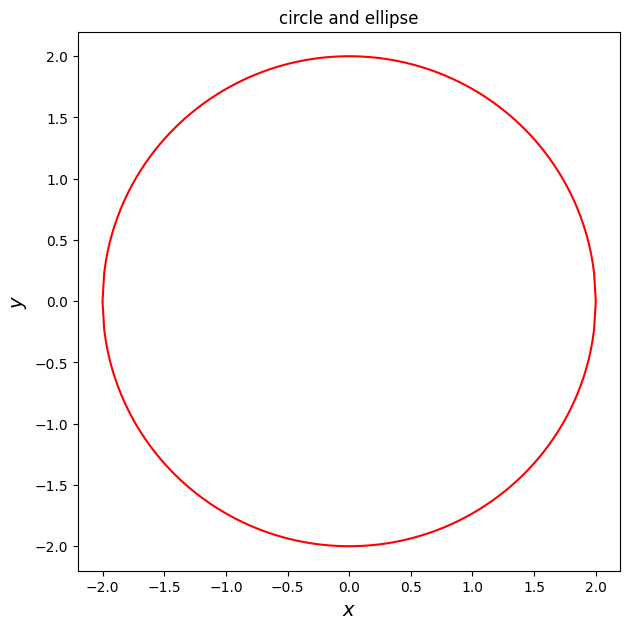

In [473]:
# define x range [a,b]
a2=-2.+1.e-5
b2=2.-1.e-5
# define the number N of points for the plot
N1=300
N2=300
# create the array of N values for x
x2=np.linspace(a2,b2,N2)
# evaluate the function
y2=f(x2)
z2=-f(x2)
# plot f(x)
plt.figure(figsize=(7,7))
plt.plot(x2,y2,color='red')
plt.plot(x2,z2,color='red')
plt.title('circle and ellipse')
plt.xlabel("$x$",fontsize=14)
plt.ylabel("$y$",fontsize=14)